In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

In [2]:
def get_dft(x):
    """
    Return the non-redundant real/imaginary components
    of the DFT, expressed as amplitudes of sines/cosines
    involved
    
    Parameters
    ----------
    x: ndarray(N)
        A signal
    
    Returns
    -------
    cos_sum: ndarray(ceil(N/2)), sin_sums(ndarray(ceil(N/2)))
        DFT cosine/sine amplitudes
    """
    N = len(x)
    t = np.linspace(0, 1, N+1)[0:N]
    n_freqs = int(np.ceil(N/2))
    f = np.fft.fft(x)
    cos_sums = np.real(f)[0:n_freqs]/(N/2)
    sin_sums = -np.imag(f)[0:n_freqs]/(N/2)
    return cos_sums, sin_sums

In [3]:
x, sr = librosa.load("samples/classical_segment_001.wav")
ipd.Audio(x, rate=sr)

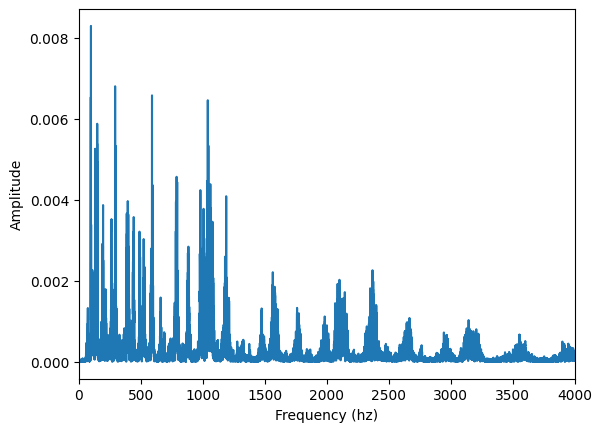

In [4]:
x, sr = librosa.load("samples/classical_segment_001.wav")
N = len(x)
c, s = get_dft(x)
amps = np.sqrt(c**2 + s**2)
freqs = np.arange(len(c))*sr/len(x)
plt.plot(freqs, amps)
plt.xlabel("Frequency (hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 4000])
ipd.Audio(x, rate=sr)

In [23]:
def specgram(x, w, h, sr):
    """
    Compute the "spectrogram" 
    (amplitudes of the short-time fourier transfrom)
    Parameters
    ----------
    x: ndarray(N)
        Full audio clip of N samples
    w: int
        Window length
    h: int
        Hop length
    sr: int
        Sample rate
    
    Returns
    -------
    ndarray(w, nwindows) Spectrogram
    """
    N = len(x)
    i = 0
    nwin = int(np.floor((N-w)/h))+1
    n_freqs = int(np.ceil(w/2))
    # Make a 2D array
    # The rows correspond to frequency bins
    # The columns correspond to windows moved forward in time
    S = np.zeros((n_freqs, nwin))
    # Loop through all of the windows, and put the fourier
    # transform amplitudes of each window in its own column
    for j in range(nwin):
        # Pull out the audio in the jth window
        # Ex) First window x[0:w]
        # Ex) Second window x[h:h+w]
        # Ex) Third window x[2h:2h+w]
        xj = x[h*j:h*j+w]
        # Do the fourier transform of the jth window
        c, s = get_dft(xj)
        amps = np.sqrt(c**2 + s**2)
        # Put the fourier transform amplitudes into S
        S[:, j] = amps
    return S

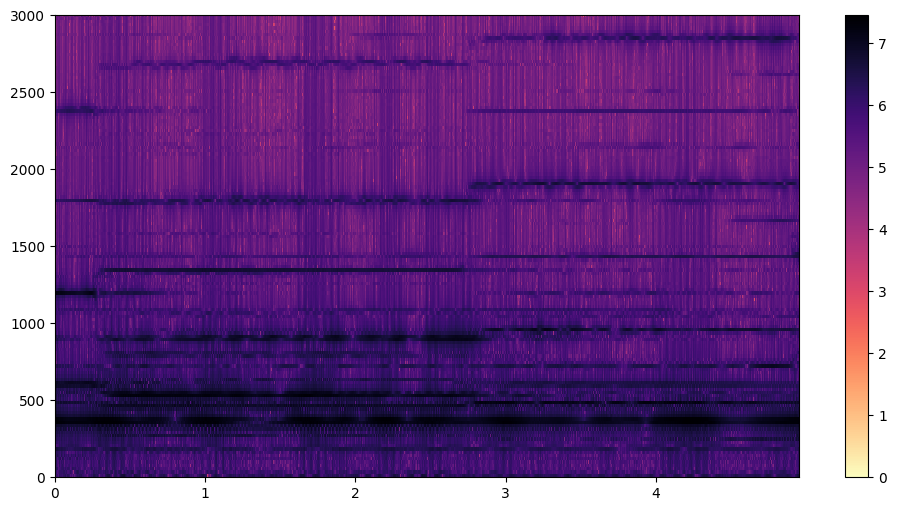

In [24]:
# Time resolution vs frequency resolution tradeoff in window size
x, sr = librosa.load("samples/classical_segment_407.wav", sr=44100)
win = 2048
hop = 256
S = specgram(x, win, hop, sr)
times = hop*np.arange(S.shape[1])/sr
freqs = np.arange(S.shape[0])*sr/win
S = np.log10(S/np.min(S))
plt.figure(figsize=(12, 6))
plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
plt.ylim([3000, 0])
plt.gca().invert_yaxis()
plt.colorbar()
#plt.xlim([0, 2])

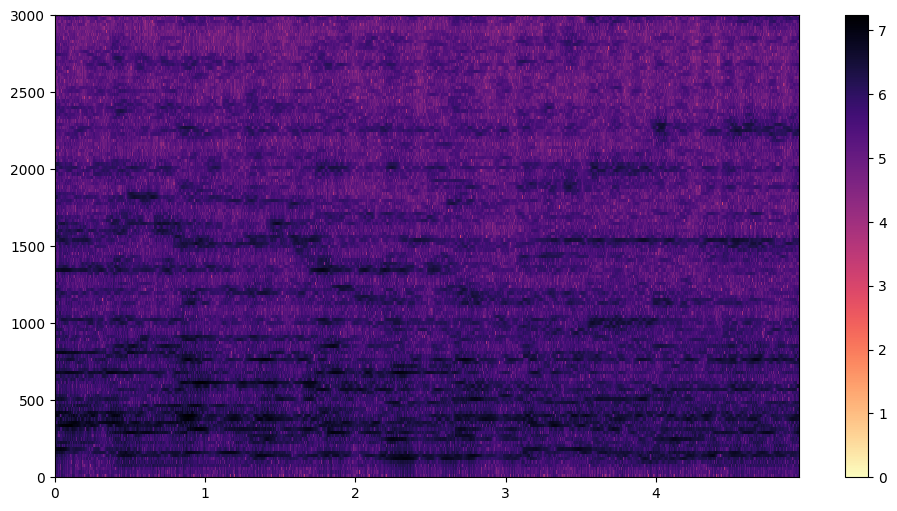

In [25]:
# Time resolution vs frequency resolution tradeoff in window size
x, sr = librosa.load("samples/classical_segment_538.wav", sr=44100)
win = 2048
hop = 256
S = specgram(x, win, hop, sr)
times = hop*np.arange(S.shape[1])/sr
freqs = np.arange(S.shape[0])*sr/win
S = np.log10(S/np.min(S))
plt.figure(figsize=(12, 6))
plt.imshow(S, cmap='magma_r', extent = (times[0], times[-1], freqs[-1], freqs[0]), aspect='auto', interpolation='none')
plt.ylim([3000, 0])
plt.gca().invert_yaxis()
plt.colorbar()
#plt.xlim([0, 2])

In [27]:
S.shape

(1024, 854)

In [29]:
times.shape

(854,)

In [32]:
freqs.shape

(1024,)